In [1]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import *
import importlib
from common import *

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
pca_object, pca_result, factors, strength = DWT_quant(lighthouse)

38500
bits: 26337, strength: 3.819660112501051
bits: 21122, strength: 6.180339887498947
bits: 32008, strength: 2.360679774997897
bits: 37220, strength: 1.4589803375031547
bits: 42409, strength: 0.9016994374947426
bits: 36958, strength: 1.5081631925903787
bits: 38320, strength: 1.322755715965638
bits: 39912, strength: 1.1619265287662965
bits: 38352, strength: 1.3146478508367563
bits: 38979, strength: 1.2497054647508068
bits: 38820, strength: 1.2898420666624417
bits: 38272, strength: 1.3127323295424205
bits: 38485, strength: 1.318269061949931
bits: 38494, strength: 1.3184841075178493
bits: 38502, strength: 1.3201157167582733
bits: 38425, strength: 1.319357363858059
bits: 38377, strength: 1.321124106725214
bits: 38487, strength: 1.3205008874517303
bits: 38502, strength: 1.3198260517258584
bits: 38502, strength: 1.3199708842420659
bits: 38502, strength: 1.3199155631435509
bits: 38502, strength: 1.3198813728243735
bits: 38502, strength: 1.3198602420450356
bits: 38502, strength: 1.3198471825

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 38502
Bits for huffman table = 1424
38.502
Generating huffcode and ehuf using custom tables
Decoding rows
Error: 11.78


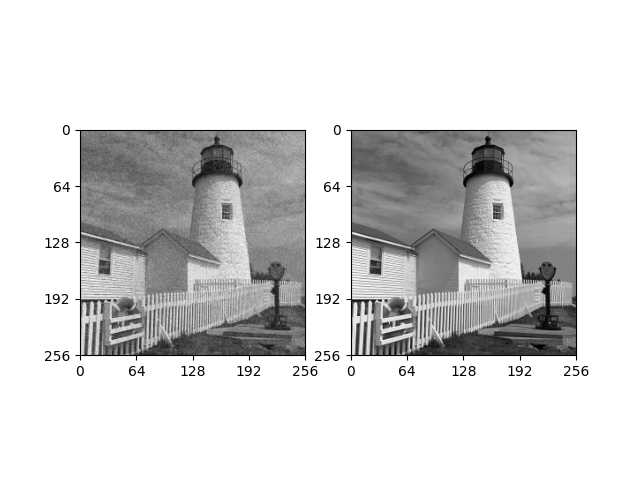

In [4]:
# reconstructed0 = inverse_DWT(Yq, N, g1, g2)
vlc, header = PCA_huffenc(pca_result, opthuff=True)
print(np.sum(vlc[:, 1])/1000)
pca_decoded = PCA_huffdec(vlc, hufftab=header)

DWT_decoded = inverse_PCA_DWT(pca_object, pca_result)



DWT_final = quantdwt2(DWT_decoded, factors, strength=strength)
reconstructed = inverse_DWT(DWT_final, N, g1, g2)


fig, axs = plt.subplots(1, 2)
plot_image(reconstructed, ax=axs[0])
plot_image(lighthouse, ax=axs[1])

# size_of_img = np.sum(vlc[:, 1])
# axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')


print("Error:", np.std(reconstructed-lighthouse).round(2))

In [10]:
vlc, header = DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)
Z = DWT_huffdec(vlc, 10, factors, strength, N=7, hufftab=header)

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


In [3]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)


Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 83730
Bits for huffman table = 1424
83730
Generating huffcode and ehuf using custom tables
Decoding rows
48.58346993328428


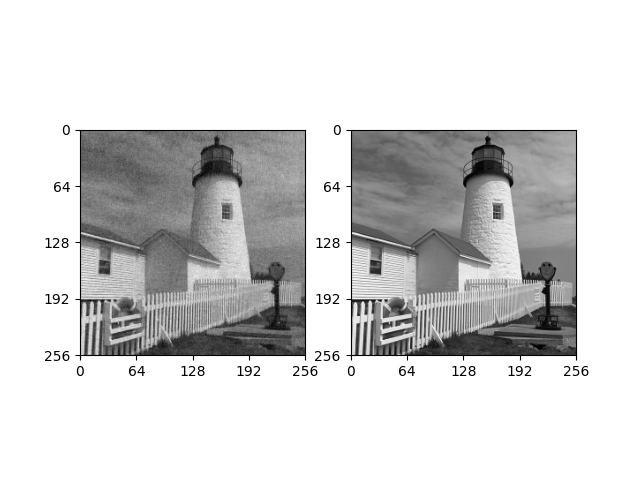

In [4]:
from PCA_DWT import *

Y = DWT(lighthouse, N)
Yq = quant1(Y, 10, 1)
ratios = get_ratios(Y, N, g1, g2)
factors = get_factors(Y, N)
Yq, _ = quantdwt(Y, 10*np.ones((3, N+1))*ratios, factors, 0)
pca, result = PCA_DWT(Yq)
result_clipped = np.clip(result, -1023, 1023)
encoded, header = PCA_huffenc(result_clipped, opthuff=True)

print(np.sum(encoded[:, 1]))

decoded = PCA_huffdec(encoded, header)
recon = inverse_PCA_DWT(pca, decoded)

recon = quantdwt2(recon, factors, 0)
Z = inverse_DWT(recon, N, g1, g2)

fig, axs = plt.subplots(1, 2)
plot_image(Z, ax=axs[0])
plot_image(lighthouse, ax=axs[1])

print(np.std(Z-lighthouse))

In [4]:
bpp(lighthouse)*256*256

493398.1567807872